In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.5.0


# New Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfFall = pd.read_csv('/content/drive/MyDrive/fall.csv')
uploaded = open('/content/WISDM_ar_v1.1_raw.txt', "r")

In [ ]:
dfFall= dfFall[dfFall['Sensor Type'] == 0]
dfFall


,Unnamed: 0,TimeStamp,Sample No,X-Axis,Y-Axis,Z-Axis,Sensor Type,Sensor ID,Fall
0,0,116,1,0.136265,0.937041,-0.119517,0,0,1
1,1,116,2,0.135898,0.932403,-0.114513,0,0,1
2,2,116,3,0.134678,0.932403,-0.113536,0,0,1
3,3,117,4,0.133212,0.931914,-0.114513,0,0,1
4,4,117,5,0.135409,0.931549,-0.116710,0,0,1
...,...,...,...,...,...,...,...,...,...
5960,5960,14789,295,0.255859,0.479736,0.902832,0,4,1
5961,5961,14835,296,0.258301,0.478027,0.851562,0,4,1
5962,5962,14879,297,0.253174,0.471680,0.906250,0,4,1
5963,5963,14934,298,0.260254,0.482422,0.849121,0,4,1


In [ ]:
df = dfFall.drop(['Unnamed: 0', 'Sample No','Sensor Type','Sensor ID','Fall'], axis = 1)
df['user']=40
df['activity']='Fall'
df.columns=['time','x','y','z','user','activity']
df_new = df[['user', 'activity', 'time','x','y','z']]

In [ ]:
df_new

,user,activity,time,x,y,z
0,40,Fall,116,0.136265,0.937041,-0.119517
1,40,Fall,116,0.135898,0.932403,-0.114513
2,40,Fall,116,0.134678,0.932403,-0.113536
3,40,Fall,117,0.133212,0.931914,-0.114513
4,40,Fall,117,0.135409,0.931549,-0.116710
...,...,...,...,...,...,...
5960,40,Fall,14789,0.255859,0.479736,0.902832
5961,40,Fall,14835,0.258301,0.478027,0.851562
5962,40,Fall,14879,0.253174,0.471680,0.906250
5963,40,Fall,14934,0.260254,0.482422,0.849121


In [ ]:
# file = "WISDM_ar_v1.1_raw.txt"

# for f in uploaded.keys():
#     file = open(f, 'r')
lines = uploaded.readlines()
    


processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  246683


In [ ]:
processedList[:10]

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621']]

In [ ]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data = pd.DataFrame(data = processedList, columns = columns)
data = pd.concat([data,df_new])
data

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164
...,...,...,...,...,...,...
5960,40,Fall,14789,0.255859,0.479736,0.902832
5961,40,Fall,14835,0.258301,0.478027,0.851562
5962,40,Fall,14879,0.253174,0.47168,0.90625
5963,40,Fall,14934,0.260254,0.482422,0.849121


In [ ]:
data= data[data['activity'] != 'Jogging']
data

,user,activity,time,x,y,z
597,33,Walking,49394992294000,0.84446156,8.008764,2.7921712
598,33,Walking,49395102310000,1.1168685,8.62168,3.7864566
599,33,Walking,49395202316000,-0.50395286,16.657684,1.3075534
600,33,Walking,49395302292000,4.7943625,10.760075,-1.1849703
601,33,Walking,49395412338000,-0.040861044,9.234595,-0.6946377
...,...,...,...,...,...,...
5960,40,Fall,14789,0.255859,0.479736,0.902832
5961,40,Fall,14835,0.258301,0.478027,0.851562
5962,40,Fall,14879,0.253174,0.47168,0.90625
5963,40,Fall,14934,0.260254,0.482422,0.849121


In [ ]:
data.shape

(158265, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158265 entries, 597 to 5964
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      158265 non-null  object
 1   activity  158265 non-null  object
 2   time      158265 non-null  object
 3   x         158265 non-null  object
 4   y         158265 non-null  object
 5   z         158265 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
data['activity'].value_counts()

Walking       99080
Upstairs      25820
Downstairs    25463
Fall           4173
Sitting        2099
Standing       1630
Name: activity, dtype: int64

In [ ]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158265 entries, 597 to 5964
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      158265 non-null  object 
 1   activity  158265 non-null  object 
 2   time      158265 non-null  object 
 3   x         158265 non-null  float64
 4   y         158265 non-null  float64
 5   z         158265 non-null  float64
dtypes: float64(3), object(3)
memory usage: 8.5+ MB


In [ ]:
Fs = 20#sampling rate in Hz
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Upstairs', 'Downstairs', 'Fall', 'Sitting', 'Standing'], dtype='object')

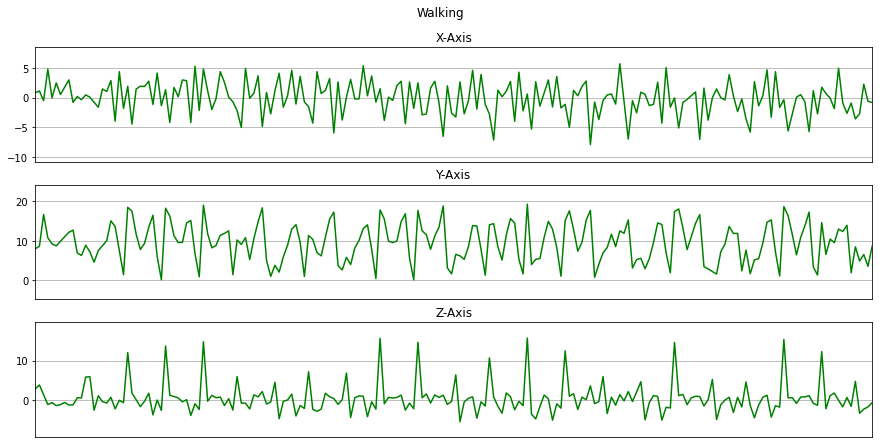

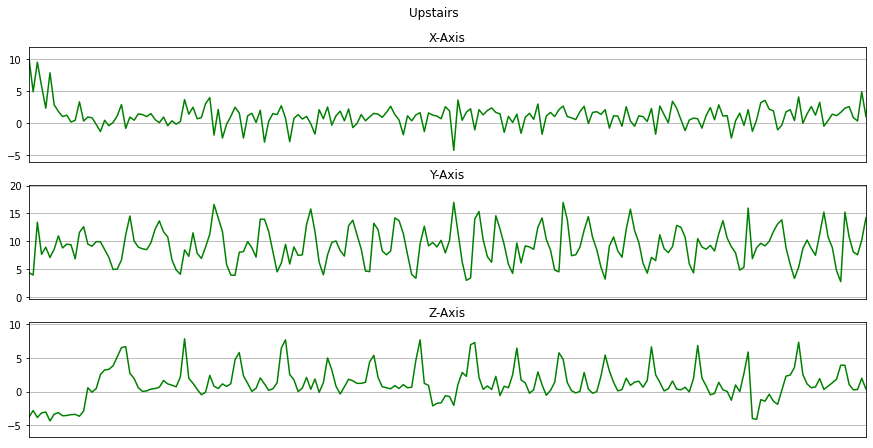

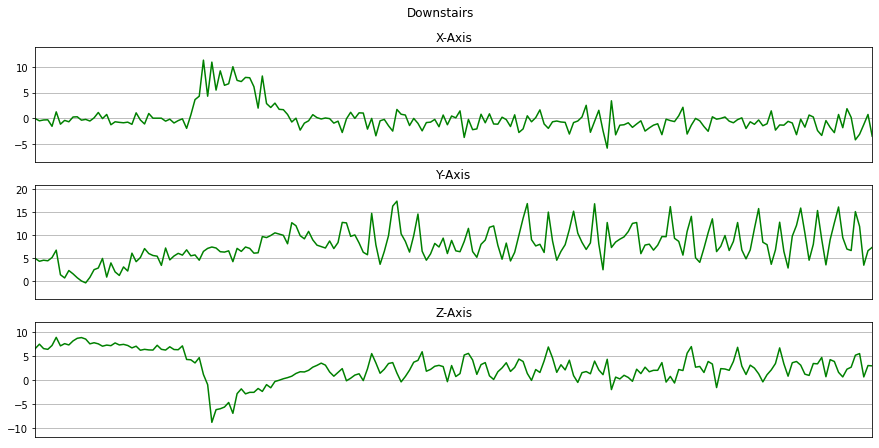

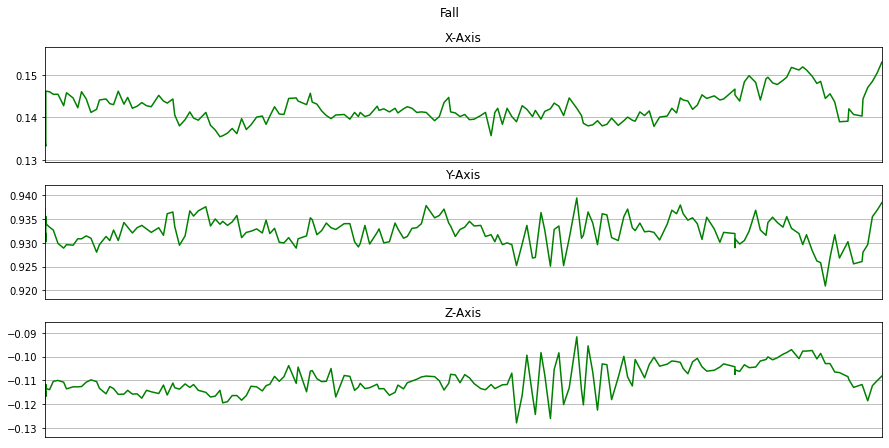

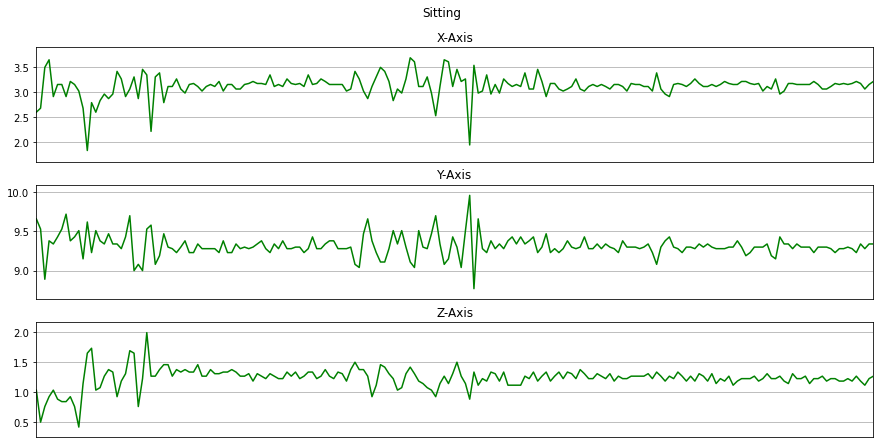

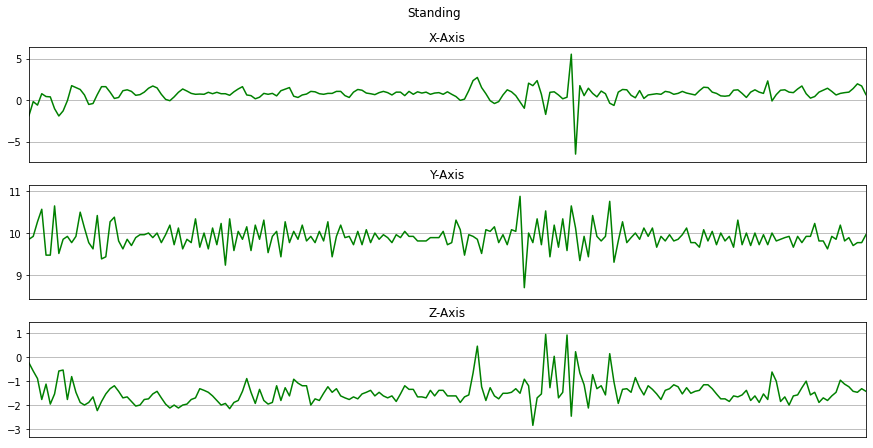

In [ ]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [ ]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [ ]:
df['activity'].value_counts()

Walking       99080
Upstairs      25820
Downstairs    25463
Fall           4173
Sitting        2099
Standing       1630
Name: activity, dtype: int64

In [ ]:
Walking = df[df['activity']=='Walking'].head(1630).copy()
#Jogging = df[df['activity']=='Jogging'].head(1630).copy()
Upstairs = df[df['activity']=='Upstairs'].head(1630).copy()
Downstairs = df[df['activity']=='Downstairs'].head(1630).copy()
Sitting = df[df['activity']=='Sitting'].head(1630).copy()
Fall = df[df['activity']=='Fall'].head(1630).copy()
Standing = df[df['activity']=='Standing'].copy()

balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Upstairs, Downstairs, Sitting,Fall, Standing])
balanced_data.shape

(9780, 4)

In [ ]:
balanced_data['activity'].value_counts()

Walking       1630
Upstairs      1630
Fall          1630
Downstairs    1630
Standing      1630
Sitting       1630
Name: activity, dtype: int64

In [ ]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [ ]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [ ]:
label.classes_

array(['Downstairs', 'Fall', 'Sitting', 'Standing', 'Upstairs', 'Walking'],
      dtype=object)

In [ ]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X.head()

,x,y,z,label
0,0.121549,0.038416,0.908155,5
1,0.244883,0.178278,1.328784,5
2,-0.488959,2.012018,0.280091,5
3,1.909904,0.666239,-0.774364,5
4,-0.279290,0.318139,-0.566930,5


In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 20
frame_size = Fs*4 
hop_size = Fs*2 

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

((243, 80, 3), (243,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((194, 80, 3), (49, 80, 3))

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [ ]:
X_train = X_train.reshape(194, 80, 3, 1)
X_test = X_test.reshape(49, 80, 3, 1)

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [ ]:
import sys
sys.path
sys.executable

'/usr/bin/python3'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D  #this is to perform the convolution operation

from keras.layers import MaxPooling2D  #used for pooling operation

from keras.layers import Flatten  #used for Flattening. Flattening is the process of converting all the resultant 2 dimensional arrays into a single long continuous linear vector.
from keras.layers import Dropout
from keras.layers import Dense  #used to perform the full connection of the neural network
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 15, validation_data= (X_test, y_test), verbose=1)

Epoch 1/15
7/7 [==============================] - 1s 69ms/step - loss: 1.6402 - accuracy: 0.3112 - val_loss: 1.0676 - val_accuracy: 0.6939
Epoch 2/15
7/7 [==============================] - 0s 12ms/step - loss: 0.9527 - accuracy: 0.7031 - val_loss: 0.7204 - val_accuracy: 0.7551
Epoch 3/15
7/7 [==============================] - 0s 13ms/step - loss: 0.7720 - accuracy: 0.6667 - val_loss: 0.5052 - val_accuracy: 0.8163
Epoch 4/15
7/7 [==============================] - 0s 13ms/step - loss: 0.4872 - accuracy: 0.8419 - val_loss: 0.3919 - val_accuracy: 0.8980
Epoch 5/15
7/7 [==============================] - 0s 13ms/step - loss: 0.4843 - accuracy: 0.8165 - val_loss: 0.3169 - val_accuracy: 0.8980
Epoch 6/15
7/7 [==============================] - 0s 14ms/step - loss: 0.4599 - accuracy: 0.8374 - val_loss: 0.2857 - val_accuracy: 0.8776
Epoch 7/15
7/7 [==============================] - 0s 12ms/step - loss: 0.3888 - accuracy: 0.8275 - val_loss: 0.2842 - val_accuracy: 0.8571
Epoch 8/15
7/7 [===========

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 79, 2, 16)         80        
_________________________________________________________________
dropout_3 (Dropout)          (None, 79, 2, 16)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 78, 1, 32)         2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 78, 1, 32)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2496)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                159808    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  sns.set(font_scale=1)
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

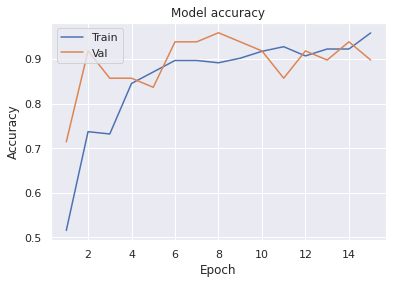

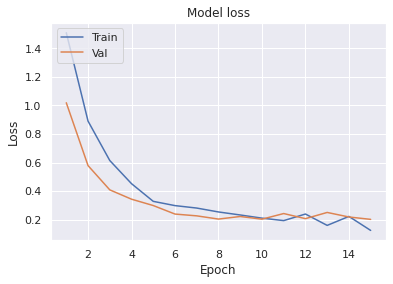

In [ ]:
plot_learningCurve(history, 15)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

NameError: ignored

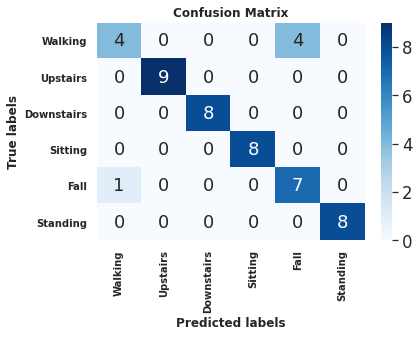

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.set(font_scale=1.5) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'12'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font,fontweight='bold');
ax.set_ylabel('True labels', fontdict=label_font,fontweight='bold');

title_font = {'size':12}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font,fontweight='bold');

ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Walking', 'Upstairs', 'Downstairs', 'Sitting','Fall', 'Standing'],fontweight='bold',rotation='vertical');
ax.yaxis.set_ticklabels(['Walking', 'Upstairs', 'Downstairs', 'Sitting','Fall', 'Standing'],fontweight='bold',rotation='horizontal');
plt.show()

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1605b51cd0>)

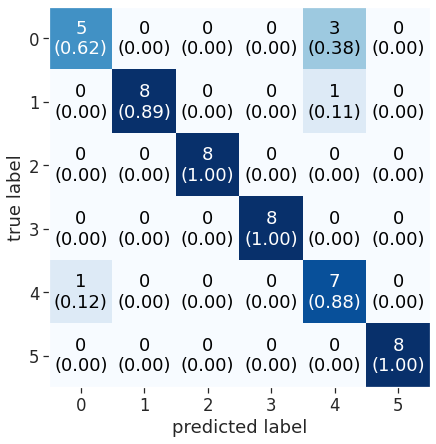

In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')
    
mat = get_confusion_matrix(y_test, y_pred)
ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(['Walking', 'Upstairs', 'Downstairs', 'Sitting','Fall', 'Standing'],fontweight='bold',rotation='vertical');
ax.yaxis.set_ticklabels(['Walking', 'Upstairs', 'Downstairs', 'Sitting','Fall', 'Standing'],fontweight='bold',rotation='horizontal');
plot_confusion_matrix(conf_mat=mat,hide_ticks=False,show_normed=True, figsize=(7,7))